# Python for ML
## Final exam - Solutions
## Date: 08th November, 2025

In [75]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Question NO 01: Answer

In [76]:
# -- Load the TrainingHours column into a NumPy array.
# -- Convert to float datatype
# -- Find mean & standard deviation

# Final output: Two numeric values

In [77]:
df = pd.read_csv('final-employee-ds.csv')
df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


In [78]:
# df.columns

In [79]:
# df.info()

In [80]:
# Load the TrainingHours column into a NumPy array

TrainingHours_array=np.array(df["TrainingHours"])
# print(TrainingHours_array)
# print(type(TrainingHours_array))
# print(type(TrainingHours_array[0]), "\n")


# Convert to float datatype

TrainingHours_array_float= np.array([float(x) for x in TrainingHours_array])
# print(TrainingHours_array_float)
# print(type(TrainingHours_array_float))
# print(type(TrainingHours_array_float[0]))

In [81]:
# Find mean & standard deviation

mean=np.mean(TrainingHours_array_float)
std=np.std(TrainingHours_array_float)
print(mean)
print(std)

24.19
13.842467265628624


### Question NO 02: Answer

In [82]:
# """
# -- Handle missing values (if any):
# -- Fill missing Salary with department-wise median
# -- Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5
# -- Final output: One numeric value """

In [83]:
# df['Salary'].isnull().sum()

In [84]:
# getting all dept-wise Null

dept_wise_medians = df.groupby("Department")["Salary"].median()
# print(dept_wise_medians)
# print('\n')

# accessing them - checking
# print(dept_wise_medians["IT"])
# print(dept_wise_medians["Finance"])

In [85]:
# print(dept_wise_medians)

In [86]:
# whole salary column median - not our target
# df["Salary"].median()

In [87]:
# print(df.isnull().sum()) - total nan 4

# df['Salary']=df['Salary'].fillna(df['Salary'].median()) - missing values replaces with whole median

In [88]:
# check Null and get index

# print(df['Salary'].hasnans)
x = df[df["Salary"].isnull()].index
# print(df.loc[x]["Salary"])
# print(df.loc[x, ["Salary", "Department"]],'\n')

# Fill missing Salary with department-wise median

# manual way
# df.loc[(df["Department"] == "IT") & (df["Salary"].isnull()), "Salary"] = dept_medians["IT"]
# df.loc[(df["Department"] == "Finance") & (df["Salary"].isnull()), "Salary"] = dept_medians["Finance"]

#$ using for loop
for dept in dept_wise_medians.index:
    df.loc[(df["Department"] == dept) & (df["Salary"].isnull()), "Salary"] = dept_wise_medians[dept]

# print(df['Salary'].hasnans)
# print(df.loc[x, ["Salary", "Department"]], '\n')

In [89]:
# Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

df_filter = df[(df["ExperienceYears"] > 12) & (df["ProjectCount"] > 5)]
# print(df_filter.head())
total = df_filter["Salary"].sum()
print(total)

1985775.5


### Question NO 03: Answer

In [90]:
# Filter employees who:
# Department = "IT" or "Finance"
# Age between 30–45
# PerformanceScore > 88
# Sort by Salary descending 
# Final output: Table with Name, Department, Salary, PerformanceScore


df_new = df[
        ((df["Department"] == "IT") | (df["Department"] == "Finance")) &
        ((df["Age"] > 30) & (df["Age"] < 45)) &
        (df["PerformanceScore"] > 88)]

# print(type(df_new))
# display(df_new.head())

df_new = df_new.sort_values(by="Salary", ascending=False)
# print(df_new, "\n")


result = df_new[["Name", "Department", "Salary", "PerformanceScore"]]
print(result)

           Name Department   Salary  PerformanceScore
4    Employee_5    Finance  85543.0                97
32  Employee_33         IT  83919.0                98
55  Employee_56    Finance  49540.0                94


### Question NO 04: Answer

In [91]:
# check if any null in salary
# print(df.loc[x], '\n')
# print(df['Salary'].hasnans)

In [92]:
# Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)
# Filter top 5 employees by SalaryPerHour
# Final output: Table(5 Rows) with Name, SalaryPerHour

df["SalaryPerHour"] = df["Salary"] / (df["WorkHoursPerWeek"]* 4)
# df.head()

df_top = df.sort_values(by="SalaryPerHour", ascending=False)
# print(df_top.head())
print(df_top[["Name", "SalaryPerHour"]].head())

           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


### Question NO 05: Answer

In [93]:
# Create a bar chart showing the count of employees in each Department

# separated by Gender. You can solve the question with any of the package (Matplotlib , Seaborn , Plotly )
# Dataset Columns Used:
# Department → Categorical variable (IT, Finance, HR, Marketing, Management)
# Gender → Categorical variable (Male, Female)
# Expected Output
# A bar chart where:
# x-axis → Department
# y-axis → Number of employees
# Each bar split into Male and Female segments
# Colors differentiate gender


# df.head()
# df["Department"].value_counts()

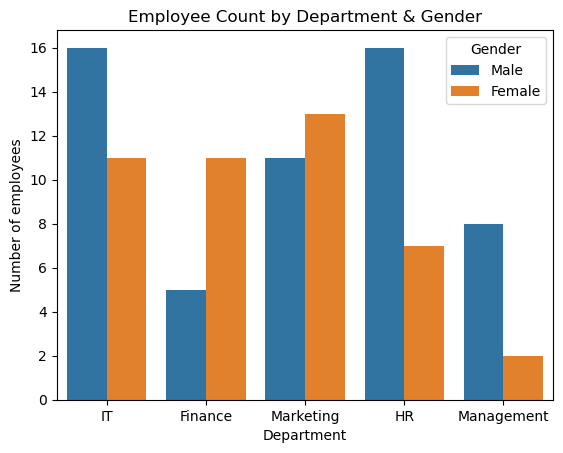

In [94]:
# print(df['Department'].hasnans)

import seaborn as sns

plt.xlabel('Department') 
plt.ylabel('Number of employees')
plt.title('count of employees in each Department')
sns.countplot(data=df, x="Department", hue="Gender")
plt.title("Employee Count by Department & Gender")
plt.show()